In [26]:
!pip install tensorflow keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.9 MB/s eta 0:00:00


#Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from keras_tuner import RandomSearch

In [2]:
from google.colab import drive
import os

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Navigate to the specific directory
dataset = '/content/drive/My Drive/CNN/Image-Classification-Using-Convolutional-Neural-Network-and-Tensorflow/dataset'

# Verify the CNN directory exists
if os.path.exists(dataset):
    print("dataset directory exists!")
    # List the contents of the CNN directory
    print("Contents of dataset directory:", os.listdir(dataset))
else:
    print("dataset directory does not exist")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
dataset directory exists!
Contents of dataset directory: ['bed_room', 'living_room', 'dining_room']


In [5]:
# Labels
dataset_path = os.listdir(dataset)
room_types = os.listdir(dataset)
room_types

['bed_room', 'living_room', 'dining_room']

# Accessing dataset folder and iterating through each image

In [6]:
rooms = []

for item in room_types:     #  For entering the folder
 # Get all the file names
 # Accessing all images from dataset/bedroom/ in iteration 1 and storing it in all_rooms as list
 # then in iteration 2 all dining rooms images will be stored in all_rooms
 all_rooms = os.listdir(dataset + '/' +item)    # Ex. dataset/bedroom
 #print(all_shoes)
 # After 1st iteration we are storing all bedroom images in one big list
 # Add them to the list
 for room in all_rooms:      # For iterating through each image of the folder
    rooms.append((item, str(dataset + '/' +item) + '/' + room))

In [7]:
# No. of entries(images)
len(rooms)

209

In [47]:
rooms[:5]

[('bed_room',
  '/content/drive/My Drive/CNN/Image-Classification-Using-Convolutional-Neural-Network-and-Tensorflow/dataset/bed_room/bed-4540208__340.jpg'),
 ('bed_room',
  '/content/drive/My Drive/CNN/Image-Classification-Using-Convolutional-Neural-Network-and-Tensorflow/dataset/bed_room/bedroom-690129__340.jpg'),
 ('bed_room',
  '/content/drive/My Drive/CNN/Image-Classification-Using-Convolutional-Neural-Network-and-Tensorflow/dataset/bed_room/bed-4343379__340.jpg'),
 ('bed_room',
  '/content/drive/My Drive/CNN/Image-Classification-Using-Convolutional-Neural-Network-and-Tensorflow/dataset/bed_room/bed-1303451__340.jpg'),
 ('bed_room',
  '/content/drive/My Drive/CNN/Image-Classification-Using-Convolutional-Neural-Network-and-Tensorflow/dataset/bed_room/bed-4065946__340.jpg')]

In [9]:
# Building a dataframe
rooms_df = pd.DataFrame(data=rooms, columns=['room type', 'image'])
print(rooms_df.head())
print(rooms_df.tail())

  room type                                              image
0  bed_room  /content/drive/My Drive/CNN/Image-Classificati...
1  bed_room  /content/drive/My Drive/CNN/Image-Classificati...
2  bed_room  /content/drive/My Drive/CNN/Image-Classificati...
3  bed_room  /content/drive/My Drive/CNN/Image-Classificati...
4  bed_room  /content/drive/My Drive/CNN/Image-Classificati...
       room type                                              image
204  dining_room  /content/drive/My Drive/CNN/Image-Classificati...
205  dining_room  /content/drive/My Drive/CNN/Image-Classificati...
206  dining_room  /content/drive/My Drive/CNN/Image-Classificati...
207  dining_room  /content/drive/My Drive/CNN/Image-Classificati...
208  dining_room  /content/drive/My Drive/CNN/Image-Classificati...


In [10]:
print("Total number of rooms in the dataset: ", len(rooms_df))

Total number of rooms in the dataset:  209


In [11]:
rooms_df['room type'].value_counts()

room type
bed_room       84
dining_room    66
living_room    59
Name: count, dtype: int64

# Accessing and Reading images usig OpenCV

In [12]:
import cv2
path = dataset + "/"


im_size = 227                 # Because AlexNet uses 227*227*3 structure

images = []
labels = []

for i in room_types:
    data_path = path + str(i)  # Adding path to 1st folder and then 2nd folder and then 3rd folder
    #filenames = [i for i in os.listdir(data_path) if i.endswith('.jpg')]
    filenames = [i for i in os.listdir(data_path) ] # Traversing through each image of that folder and storing
   # print(filenames)  # will get the names of all images which ends with .jpg extension
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)  # reading that image as array
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [13]:
images[:2]

[array([[[  0,   1,   2],
         [  0,   2,   3],
         [  1,   3,   4],
         ...,
         [ 93, 133, 162],
         [ 93, 133, 162],
         [ 93, 133, 162]],
 
        [[  0,   1,   2],
         [  0,   2,   3],
         [  1,   3,   4],
         ...,
         [ 93, 133, 162],
         [ 93, 133, 162],
         [ 93, 133, 162]],
 
        [[  0,   1,   2],
         [  0,   2,   3],
         [  1,   3,   4],
         ...,
         [ 94, 134, 163],
         [ 95, 135, 164],
         [ 95, 135, 164]],
 
        ...,
 
        [[ 14,  15,  19],
         [ 10,  11,  15],
         [  7,   9,  13],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  5,   6,  10],
         [  0,   0,   4],
         [  0,   1,   5],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  8,   9,  13],
         [  1,   2,   5],
         [  3,   4,   8],
         ...,
         [  0,   0,   0],
  

In [14]:
labels[:2]

['bed_room', 'bed_room']

In [15]:
# Transforming the image array to a numpy array

images = np.array(images)

images.shape

(209, 227, 227, 3)

In [16]:
# Normalizing each image pixel values in the range [0,1]
images = images.astype('float32') / 255.0

In [17]:
rooms_df.sample(5)

,room type,image
183,dining_room,/content/drive/My Drive/CNN/Image-Classificati...
130,living_room,/content/drive/My Drive/CNN/Image-Classificati...
7,bed_room,/content/drive/My Drive/CNN/Image-Classificati...
79,bed_room,/content/drive/My Drive/CNN/Image-Classificati...
81,bed_room,/content/drive/My Drive/CNN/Image-Classificati...


In [18]:
y=rooms_df['room type'].values
print(y[:5])

['bed_room' 'bed_room' 'bed_room' 'bed_room' 'bed_room']


In [19]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [20]:
# Label Encoding
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [21]:
# OneHot Encoding
y=y.reshape(-1,1)  # Converts 1D array to 2D array because OneHotEncoder expects a 2D array
onehotencoder = OneHotEncoder(sparse=False)  #Converted  scalar output into vector output where the correct class will be 1 and other will be 0
Y= onehotencoder.fit_transform(y)
Y.shape  #(209, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(209, 3)

In [46]:
Y[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

(188, 227, 227, 3)
(188, 3)
(21, 227, 227, 3)
(21, 3)


# Building the AlexNet Model

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras_tuner import RandomSearch

def alexnet_model(hp):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(
        filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('conv_1_kernel_size', values=[3, 5]),
        activation='relu',
        input_shape=(227, 227, 3)
    ))
    model.add(layers.MaxPooling2D(pool_size=(3, 3)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(
        filters=hp.Int('conv_2_filters', min_value=64, max_value=256, step=64),
        kernel_size=hp.Choice('conv_2_kernel_size', values=[3, 5]),     # values=[3, 5]: Kernel Size: hp.Choice('conv_kernel_size', values=[3, 5]) means the kernel size
        activation='relu'                                                          # for the convolutional layer can be either 3x3 or 5x5.(KerasTuner will randomly select one)
    ))
    model.add(layers.MaxPooling2D(pool_size=(3, 3)))                    # pool_size refers to pooling window size 3 * 3

    # Third Convolutional Layer
    model.add(layers.Conv2D(
        filters=hp.Int('conv_3_filters', min_value=128, max_value=512, step=128),
        kernel_size=hp.Choice('conv_3_kernel_size', values=[3]),                     # 3*3 Kernel size
        activation='relu'
    ))
    model.add(layers.MaxPooling2D(pool_size=(3, 3)))

    # Flatten and Dense Layers
    model.add(layers.Flatten())                            # Flattening image will convert multidimensional image array to 1D array
    model.add(layers.Dense(                                # First fully connected layer (Dense Layer 1)
        units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
        activation='relu'
    ))
    model.add(layers.Dense(3, activation='softmax'))  # Output layer for 3 classes(bedroom , dining room , living room)    # Second fully connected layer

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(            # Using Adam Optimizer
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])   # Learning rates(0.1(1e-2), 0.001(1e-3), 0.0001(1e-4))
        ),
        loss='categorical_crossentropy',  # For one-hot encoded labels we generally use 'categorical_crossentropy'
        metrics=['accuracy']
    )

    return model


## Using Keras RandomSearch Tuner to tune the parameters

In [25]:
from keras_tuner import RandomSearch

# Instantiate the tuner
tuner = RandomSearch(
    alexnet_model,                     # Model(function) name
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='alexnet_tuning',
    project_name='alexnet'
)

# Perform hyperparameter tuning
tuner.search(train_x, train_y, epochs=10, validation_data=(test_x, test_y))    # Searches for the best hyperparameters

# Retrieving the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Printing the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of filters in the first conv layer is {best_hps.get('conv_1_filters')},
the optimal kernel size for the first conv layer is {best_hps.get('conv_1_kernel_size')},
the optimal number of filters in the second conv layer is {best_hps.get('conv_2_filters')},
the optimal kernel size for the second conv layer is {best_hps.get('conv_2_kernel_size')},
the optimal number of filters in the third conv layer is {best_hps.get('conv_3_filters')},
the optimal kernel size for the third conv layer is {best_hps.get('conv_3_kernel_size')},
the optimal number of dense units is {best_hps.get('dense_units')},
the optimal learning rate is {best_hps.get('learning_rate')}.
""")


Reloading Tuner from alexnet_tuning/alexnet/tuner0.json

The optimal number of filters in the first conv layer is 128,
the optimal kernel size for the first conv layer is 5,
the optimal number of filters in the second conv layer is 64,
the optimal kernel size for the second conv layer is 3,
the optimal number of filters in the third conv layer is 128,
the optimal kernel size for the third conv layer is 3,
the optimal number of dense units is 256,
the optimal learning rate is 0.0001.



## Building the AlexNet Model with Tuned Parameters

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models

def tuned_model():
    model = models.Sequential([
        layers.Conv2D(128, (5, 5), activation='relu', input_shape=(227, 227, 3)),  # First Convolutional layer(128 filters, filter_size=5*5)
        layers.MaxPooling2D((3, 3)),                                # Pooling Widow Size of 3*3
        layers.Conv2D(64, (3, 3), activation='relu'),               # Second Covolutional layer(64 filters, filter_size= 3*3)
        layers.MaxPooling2D((3, 3)),
        layers.Conv2D(128, (3, 3), activation='relu'),            # Third Convolutional Layer
        layers.MaxPooling2D((3, 3)),
        layers.Flatten(),                                         # Flattening the outputs of Covolutional layer to 1D
        layers.Dense(256, activation='relu'),                      # Dense Layer 1
        layers.Dense(3, activation='softmax')  # Output layer for 3  classes    # Dense Layer 2
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Using Adam Optimizer with learning rate 0.0001
        loss='categorical_crossentropy',                          # Using categorical crossentropy for one-hot encoded labels
        metrics=['accuracy']
    )
    return model

In [27]:
# Instantiate the model
model = tuned_model()

In [28]:
# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 223, 223, 128)     9728      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 128)        

## Training and Evaluating the Model with tuned parameters

In [29]:
# Training the model
history = model.fit(train_x, train_y, epochs=30, validation_data=(test_x, test_y))

Epoch 1/30
6/6 [==============================] - 28s 4s/step - loss: 1.1126 - accuracy: 0.3777 - val_loss: 1.0736 - val_accuracy: 0.3333
Epoch 2/30
6/6 [==============================] - 26s 4s/step - loss: 1.0937 - accuracy: 0.3457 - val_loss: 1.0982 - val_accuracy: 0.4762
Epoch 3/30
6/6 [==============================] - 28s 5s/step - loss: 1.0838 - accuracy: 0.4362 - val_loss: 1.0697 - val_accuracy: 0.4762
Epoch 4/30
6/6 [==============================] - 25s 4s/step - loss: 1.0631 - accuracy: 0.4362 - val_loss: 1.0552 - val_accuracy: 0.4762
Epoch 5/30
6/6 [==============================] - 26s 5s/step - loss: 1.0563 - accuracy: 0.5053 - val_loss: 1.0662 - val_accuracy: 0.5238
Epoch 6/30
6/6 [==============================] - 26s 5s/step - loss: 1.0315 - accuracy: 0.4787 - val_loss: 1.0455 - val_accuracy: 0.5238
Epoch 7/30
6/6 [==============================] - 25s 4s/step - loss: 1.0059 - accuracy: 0.5213 - val_loss: 1.0344 - val_accuracy: 0.5238
Epoch 8/30
6/6 [==================

# Observation from Above Result

1. **Training Accuracy** : Increases steadily from 0.3777 to 0.8564
2. **Training Loss**: Decreases steadily from 1.1126 to 0.4329
3. **Validation Accuracy**: Fluctuates and peaks early around (0.7143) (Epoch 17) but generally worsens afterward.
4. **Validation Loss**: Decreases initially but starts increasing
significantly after a certain point, indicating possible overfitting.

**Detailed Analysis**

Epochs 1-6:

1. Training Loss Decreases :
From 1.1126 to 1.0315
2. Validation Loss Decreases :
From 1.0736 to 1.0455
3. Training Accuracy Increases :
From 0.3777 to 0.4787
4. Validation Accuracy Fluctuates :
Starts at 0.3333, peaks at 0.5714 (Epoch 5), then drops slightly to 0.5238 (Epoch 6)

Epochs 7-12:

1. Training Loss Decreases:
From 1.0059 to 0.8687
2. Validation Loss Fluctuates:
From 1.0344 to 0.9822
3. Training Accuracy Increases:
From 0.5213 to 0.6064
4. Validation Accuracy Fluctuates:
Starts at 0.5238, peaks at 0.6667 (Epoch 12)

Epochs 13-17:

1. Training Loss Decreases:
From 0.8423 to 0.7126
2. Validation Loss Fluctuates:
From 0.9500 to 0.9421
3. Training Accuracy Increases:
From 0.6170 to 0.7074
4. Validation Accuracy Fluctuates:
Starts at 0.4762, peaks at 0.7143 (Epoch 17)

Epochs 18-30:

1. Training Loss Decreases:
From 0.7026 to 0.4329
2. Validation Loss Increases:
From 0.9791 to 1.3411
3. Training Accuracy Increases:
From 0.7074 to 0.8564
4. Validation Accuracy Fluctuates and Generally Decreases:
Starts at 0.5714, peaks at 0.7143 (Epoch 25), then drops to 0.4762 (Epoch 30)

**Analysis Summary**

**Training Loss:**

Consistently decreases throughout the training, indicating that the model is learning the training data well.

**Validation Loss:**

Shows initial decrease and fluctuation up to around Epoch 17, after which it steadily increases, indicating overfitting.

**Training Accuracy:**

Consistently increases, showing that the model is improving its performance on the training data.

**Validation Accuracy:**

Fluctuates and generally worsens after peaking around Epoch 17, further indicating overfitting.

**Optimal Epochs:** Around 17 epochs.

**Overfitting:** The model shows signs of overfitting after Epoch 17, as indicated by the increasing validation loss and fluctuating validation accuracy.

# Confirming the Above Analysis by plotting the graph to check Overfitting

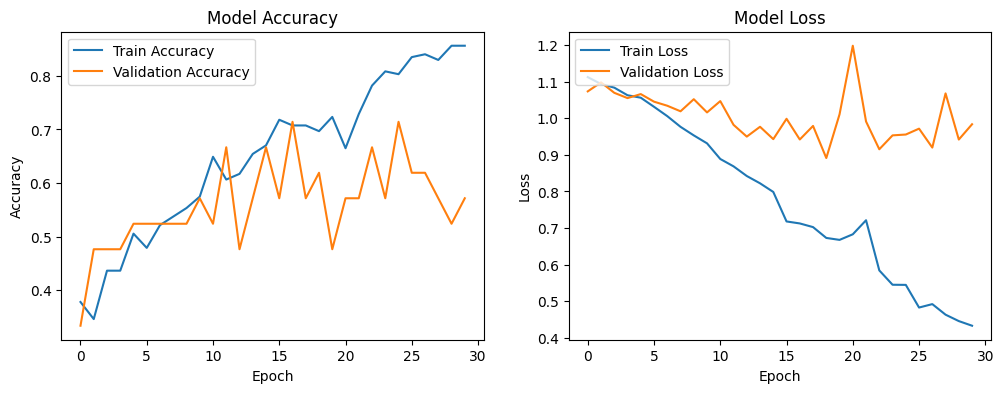

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plotting training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

1. We observe from the above grapgh that after around 17 epoch the validation accuracy is decreasing and fluctuating .

2. After around 17 epoch the validation loss increases rapidly showing Overfittig.

###Conclusion:

17 is the optimal no. of epochs for our model to train.

# Training the model again with optimal no. of epochs (17) and with tuned parameters to remove overfitting.

In [31]:
model_updated = tuned_model()

In [32]:
history_updated = model_updated.fit(train_x, train_y, epochs=17, validation_data=(test_x, test_y))

Epoch 1/17
6/6 [==============================] - 33s 5s/step - loss: 1.1144 - accuracy: 0.3457 - val_loss: 1.0597 - val_accuracy: 0.4762
Epoch 2/17
6/6 [==============================] - 26s 4s/step - loss: 1.0880 - accuracy: 0.4362 - val_loss: 1.0770 - val_accuracy: 0.5238
Epoch 3/17
6/6 [==============================] - 26s 4s/step - loss: 1.0776 - accuracy: 0.4415 - val_loss: 1.0657 - val_accuracy: 0.4762
Epoch 4/17
6/6 [==============================] - 26s 4s/step - loss: 1.0631 - accuracy: 0.4362 - val_loss: 1.0600 - val_accuracy: 0.4762
Epoch 5/17
6/6 [==============================] - 27s 4s/step - loss: 1.0446 - accuracy: 0.4574 - val_loss: 1.0607 - val_accuracy: 0.4762
Epoch 6/17
6/6 [==============================] - 27s 4s/step - loss: 1.0239 - accuracy: 0.4894 - val_loss: 1.0465 - val_accuracy: 0.5238
Epoch 7/17
6/6 [==============================] - 26s 4s/step - loss: 0.9911 - accuracy: 0.5798 - val_loss: 1.0262 - val_accuracy: 0.5714
Epoch 8/17
6/6 [==================

###Our model is giving Validation Accuracy of 61%



# Checking the prediction of Model on New Images

1/1 [==============================] - 0s 159ms/step


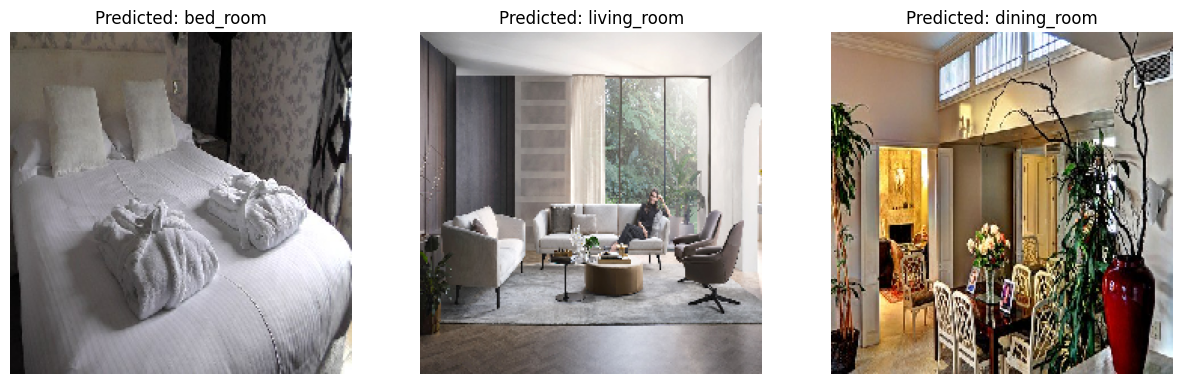

Image 1: Predicted class: bed_room
Image 2: Predicted class: living_room
Image 3: Predicted class: dining_room


In [44]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to load and preprocess a each image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(227, 227))  # Resize image to the target size
    img_array = image.img_to_array(img)  # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create a batch of size 1
    img_array /= 255.0  # Normalize the image
    return img_array

# List of new image paths
new_image_paths = [
    '/content/drive/MyDrive/CNN/Image-Classification-Using-Convolutional-Neural-Network-and-Tensorflow/dataset/bed_room/bed-1303451__340.jpg',
    '/content/drive/MyDrive/CNN/Image-Classification-Using-Convolutional-Neural-Network-and-Tensorflow/dataset/living_room/B-00-How-to-anchor-your-living-room-Thumbnail.jpg',
    '/content/drive/MyDrive/CNN/Image-Classification-Using-Convolutional-Neural-Network-and-Tensorflow/dataset/dining_room/architectural-224242__340.jpg'
]

# Loading and preprocessing the new images
new_images = np.vstack([load_and_preprocess_image(img_path) for img_path in new_image_paths])

# Making predictions
predictions = model_updated.predict(new_images)

# Interpreting predictions
class_names = ['bed_room', 'dining_room', 'living_room']
predicted_classes = np.argmax(predictions, axis=1)

# Creating figure with subplots
num_images = len(new_image_paths)
fig, axs = plt.subplots(1, num_images, figsize=(15, 5))  # Adjust figsize as needed

# Displaying the images and their predicted labels
for i, img_path in enumerate(new_image_paths):
    img = image.load_img(img_path, target_size=(227, 227))
    axs[i].imshow(img)
    axs[i].set_title(f"Predicted: {class_names[predicted_classes[i]]}")
    axs[i].axis('off')

plt.show()

# Printing the predicted classes
for i in range(num_images):
    print(f"Image {i+1}: Predicted class: {class_names[predicted_classes[i]]}")


In [ ]:
# Hence our model is giving correct predictions with 61% accuracy on test data.
# (Less accuracy percentage is due to less data since there are only 209 images in my dataset)